In [230]:
import pandas as pd
import numpy as np
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt
import gffpandas.gffpandas as gffpd

## VDR Analysis

Goal: Create a visual overlapping VDR with
- Uniprot PFam domains
- AD screen Stanford + Soto + GSL
- SFARI gene mutations
- (later) gNOMAD
- (later) ClinVar
- (later) alphafold
- (later) cosmic

Will use dna_features_viewer from https://pypi.org/project/dna-features-viewer/ to plot. It's designed for DNA but will use for protein

### 1. Downloading regions from Uniprot and reading in the gff file as a dataframe.
https://www.uniprot.org/uniprotkb/P11473/entry

In [231]:
VDR_regions = gffpd.read_gff3('../data/P11473.gff').df
VDR_regions.reset_index(inplace = True)
new_col_names = list(VDR_regions.columns[1:])
new_col_names.append("drop")
VDR_regions.set_axis(new_col_names, axis = 1, inplace = True)
VDR_regions.drop(columns = ["drop"], inplace = True)
VDR_regions

,seq_id,source,type,start,end,score,strand,phase,attributes
0,P11473,UniProtKB,Chain,1,427,.,.,.,ID=PRO_0000053542;Note=Vitamin D3 receptor
1,P11473,UniProtKB,Domain,127,423,.,.,.,Note=NR LBD;Ontology_term=ECO:0000255;evidence...
2,P11473,UniProtKB,DNA binding,21,96,.,.,.,Note=Nuclear receptor;Ontology_term=ECO:000025...
3,P11473,UniProtKB,Zinc finger,24,44,.,.,.,Note=NR C4-type;Ontology_term=ECO:0000255;evid...
4,P11473,UniProtKB,Zinc finger,60,84,.,.,.,Note=NR C4-type;Ontology_term=ECO:0000255;evid...
...,...,...,...,...,...,...,...,...,...
65,P11473,UniProtKB,Helix,349,370,.,.,.,Ontology_term=ECO:0007829;evidence=ECO:0007829...
66,P11473,UniProtKB,Turn,373,378,.,.,.,Ontology_term=ECO:0007829;evidence=ECO:0007829...
67,P11473,UniProtKB,Helix,379,404,.,.,.,Ontology_term=ECO:0007829;evidence=ECO:0007829...
68,P11473,UniProtKB,Helix,410,413,.,.,.,Ontology_term=ECO:0007829;evidence=ECO:0007829...


In [232]:
VDR_regions[VDR_regions["type"] == "Domain"]

,seq_id,source,type,start,end,score,strand,phase,attributes
1,P11473,UniProtKB,Domain,127,423,.,.,.,Note=NR LBD;Ontology_term=ECO:0000255;evidence...


In [233]:
set(VDR_regions["type"])

{'Alternative sequence',
 'Beta strand',
 'Binding site',
 'Chain',
 'Compositional bias',
 'DNA binding',
 'Domain',
 'Helix',
 'Motif',
 'Mutagenesis',
 'Natural variant',
 'Region',
 'Turn',
 'Zinc finger'}

In [234]:
domains_included = ["DNA binding", "Binding site", "Zinc finger", "Domain"]
VDR_regions_included = VDR_regions[VDR_regions["type"].isin(domains_included)]

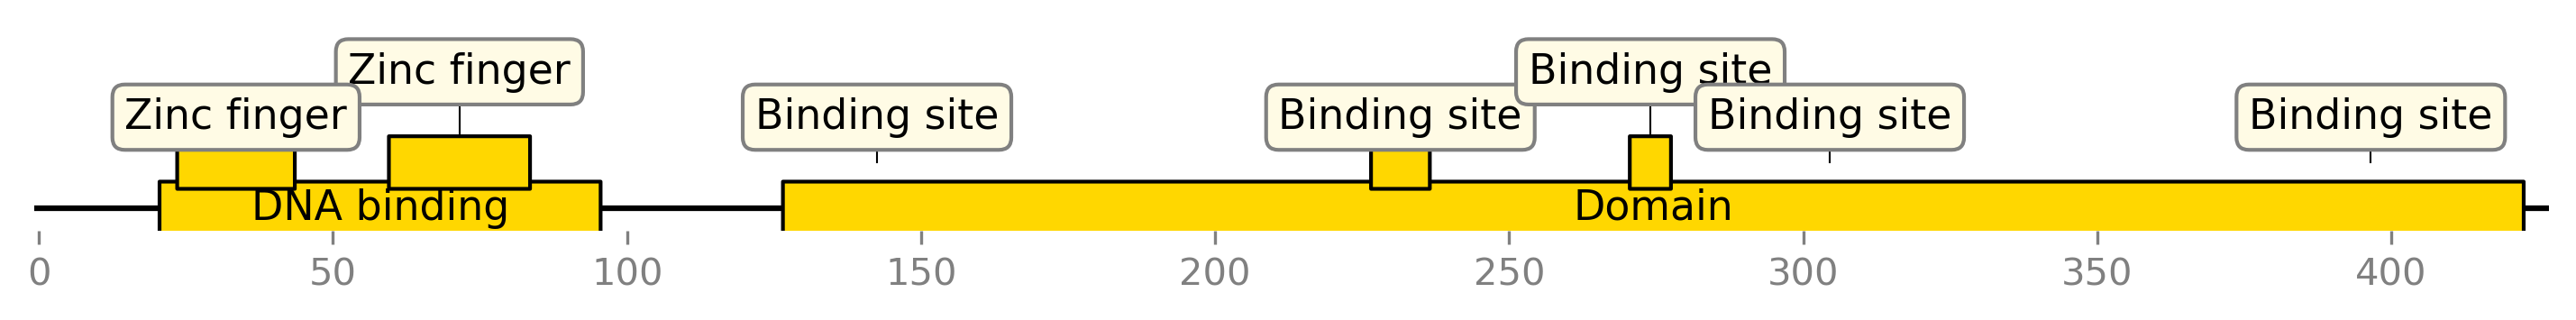

In [235]:
features = []
for i in VDR_regions_included.index:
    features.append(GraphicFeature(start=VDR_regions["start"].iloc[i], 
                                   end=VDR_regions["end"].iloc[i], strand=0, color="#ffd700",
                   label=VDR_regions["type"].iloc[i]))
fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

# Saw that length was 427 on uniprot
record = GraphicRecord(sequence_length= 427, features=features)
record.plot(ax = ax1, figure_width=20);

### 2. Adding known ADs

- Stanford AD Screen
- Soto
- GSL

VDR uniprot ID: P11473

In [236]:
GSL = pd.read_csv("../data/GSL.csv")[["uniprotID", "Start", "End"]]
GSL["list"] = "GSL AD"
Soto = pd.read_csv("../data/SotoEtAl_ADs.csv")[["uniprotID", "Start", "End"]]
Soto["list"] = "Soto AD"
Stanford = pd.read_excel("../data/Stanford_Supplementary Table 2 Domains from Tiles.xlsx")
Stanford = Stanford.rename(columns = {"UniProt ID" : "uniprotID"})[["uniprotID", "Start", "End"]]
Stanford["list"] = "Stanford AD"

known_ADs = pd.concat([GSL, Soto, Stanford])
known_ADs

,uniprotID,Start,End,list
0,P32243,231,289,GSL AD
1,O43186,200,284,GSL AD
2,P06492,411,490,GSL AD
3,Q01860,1,137,GSL AD
4,Q01860,290,360,GSL AD
...,...,...,...,...
369,Q9HCE3,1,80,Stanford AD
370,Q92610,1,80,Stanford AD
371,Q9H582,901,980,Stanford AD
372,Q8N1G0,1,80,Stanford AD


In [237]:
VDR_known_ADs = known_ADs[known_ADs["uniprotID"] == "P11473"]
VDR_known_ADs

,uniprotID,Start,End,list
21,P11473,195,238,GSL AD
502,P11473,415,427,Soto AD


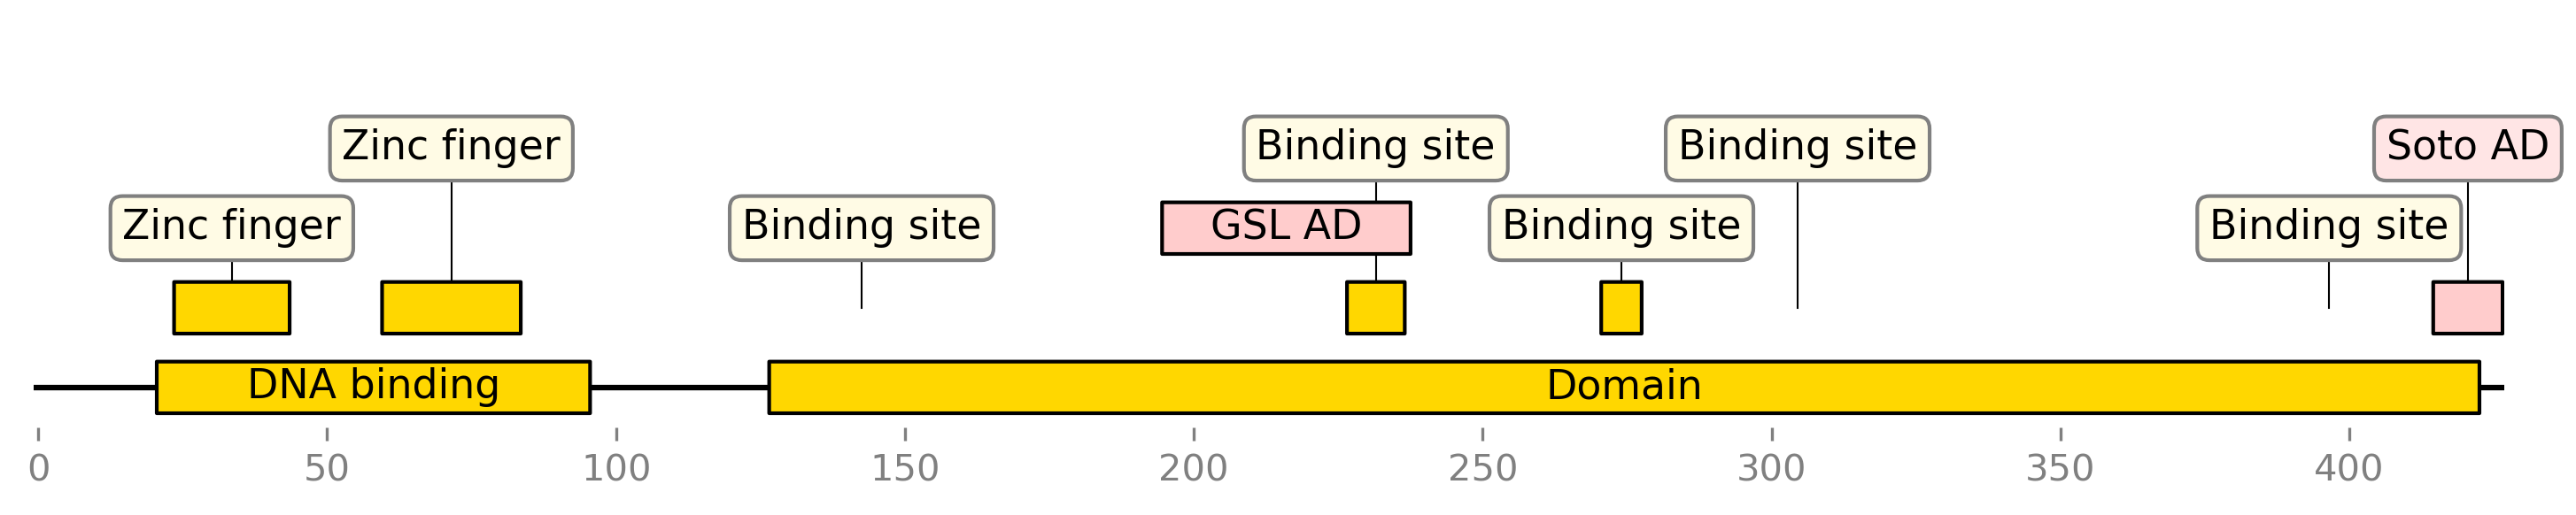

In [238]:
for i in VDR_known_ADs.index:
    features.append(GraphicFeature(start=VDR_known_ADs["Start"][i], 
                                   end=VDR_known_ADs["End"][i], strand=0, color="#ffcccc",
                   label=VDR_known_ADs["list"][i]))
fig, ax1 = plt.subplots(figsize = (12,2), dpi = 300)

# Saw that length was 427 on uniprot
record = GraphicRecord(sequence_length= 427, features=features)
record.plot(ax = ax1, figure_width=20);

3. Adding SFARI mutations